Import library

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "all_data_of_clubs.csv"
df = pd.read_csv(file_path)
df.rename(columns={"Unnamed: 0": "Team"}, inplace=True)

Attacking Visualization

<Figure size 1600x1000 with 0 Axes>

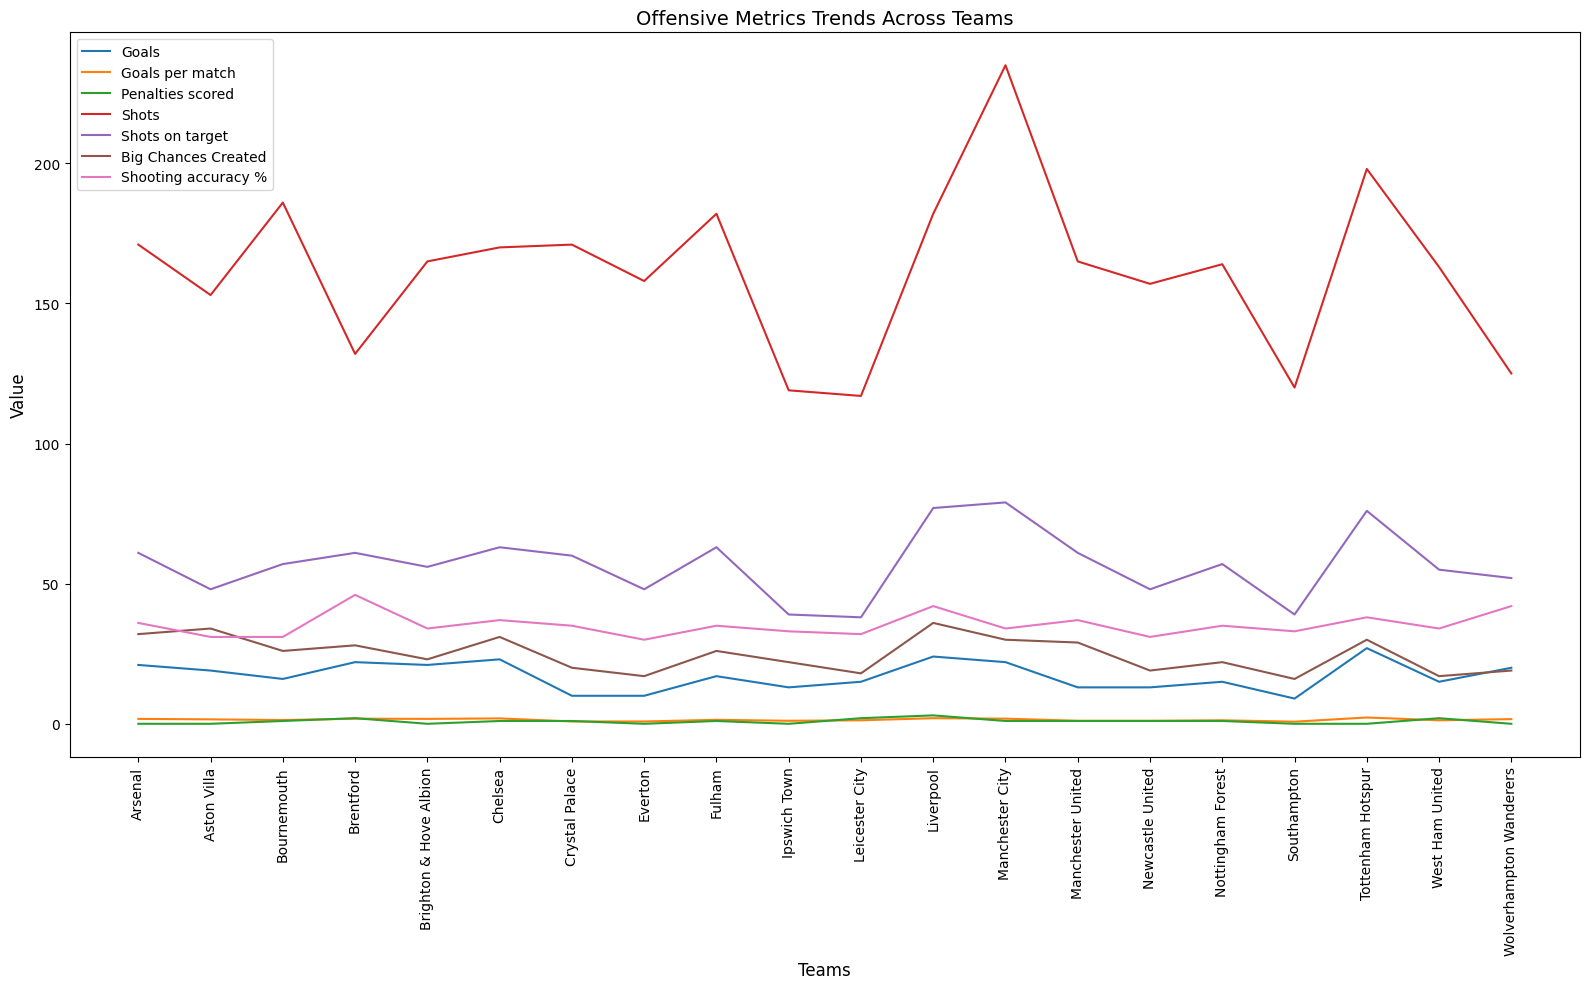

In [31]:
attacking_feature = ['Goals', 'Goals per match', 'Penalties scored', 'Shots', 'Shots on target', 'Big Chances Created', 'Shooting accuracy %']
attacking_data = pd.DataFrame(data=df[attacking_feature].values, index = df['Team'], columns=attacking_feature)
plt.figure(figsize=(16, 10))
plt.figure(figsize=(16, 10))
for feature in attacking_feature:
    sns.lineplot(data=attacking_data, x=attacking_data.index, y=feature, label=feature)

plt.title('Offensive Metrics Trends Across Teams', fontsize=14)
plt.xlabel('Teams', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


Defensing visualization

<Figure size 1600x1000 with 0 Axes>

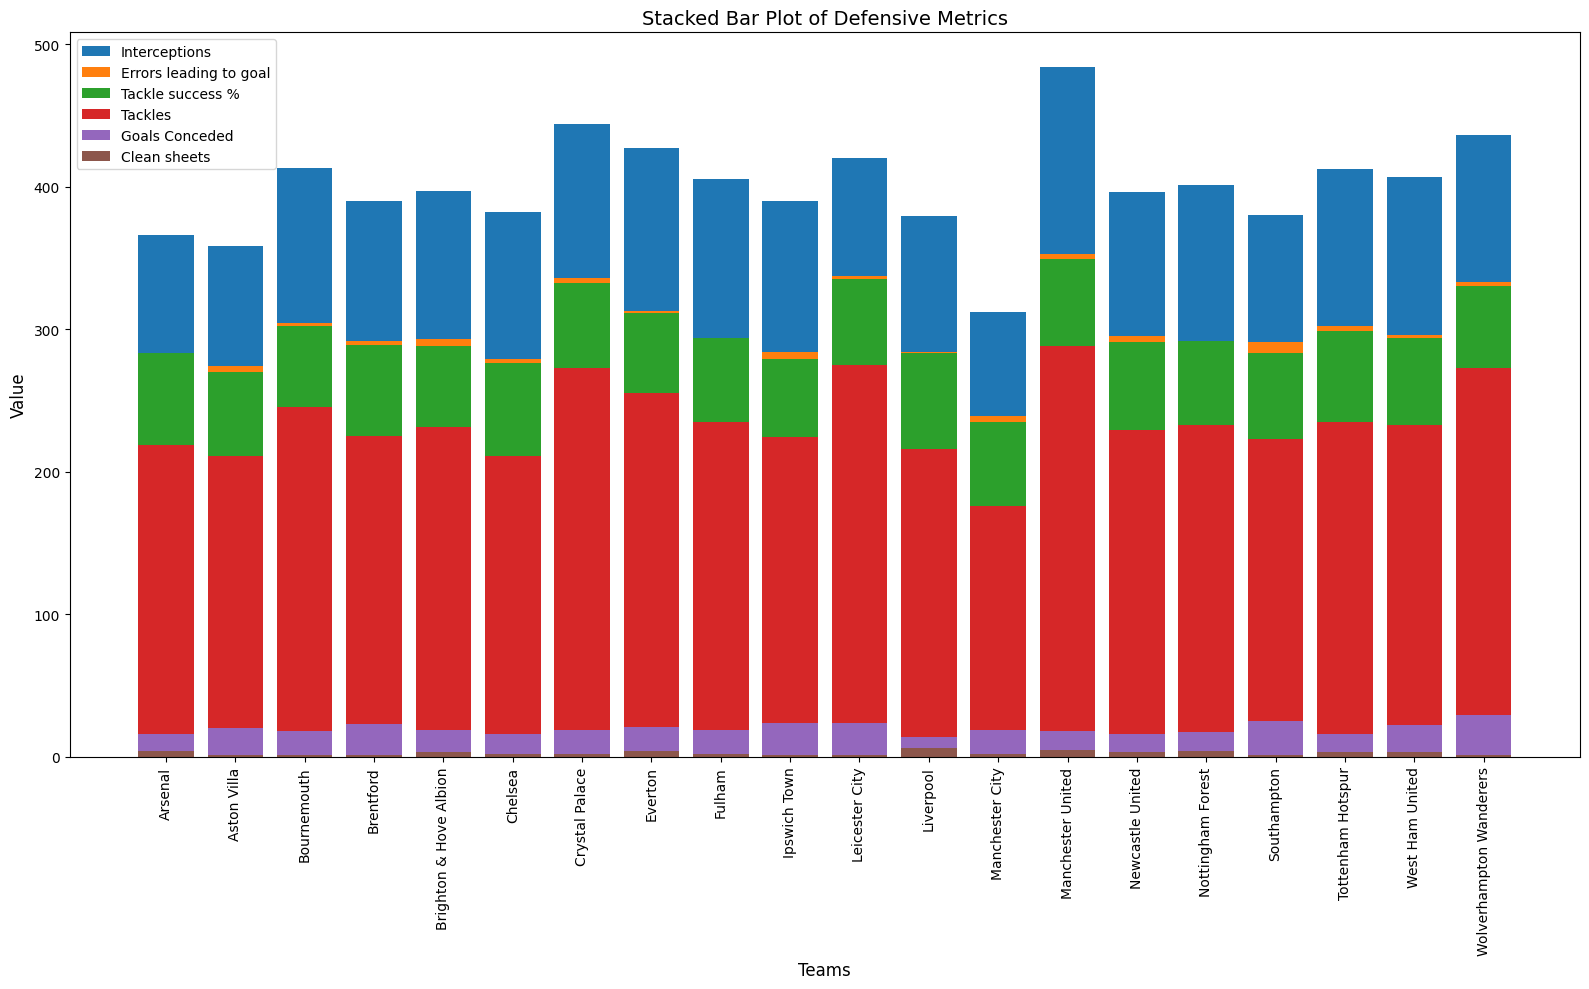

In [32]:
defense_features = ['Clean sheets', 'Goals Conceded', 'Tackles', 'Tackle success %', 'Errors leading to goal', 'Interceptions']
defense_data = pd.DataFrame(data=df[defense_features].values, columns=defense_features, index=df['Team'])
plt.figure(figsize=(16, 10)) 
defense_data['Total'] = defense_data.sum(axis=1)
cumulative_data = defense_data[defense_features].cumsum(axis=1)

plt.figure(figsize=(16, 10))
for feature in defense_features[::-1]:
    plt.bar(defense_data.index, cumulative_data[feature], label=feature)

plt.title('Stacked Bar Plot of Defensive Metrics', fontsize=14)
plt.xlabel('Teams', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


Possessing Visualization

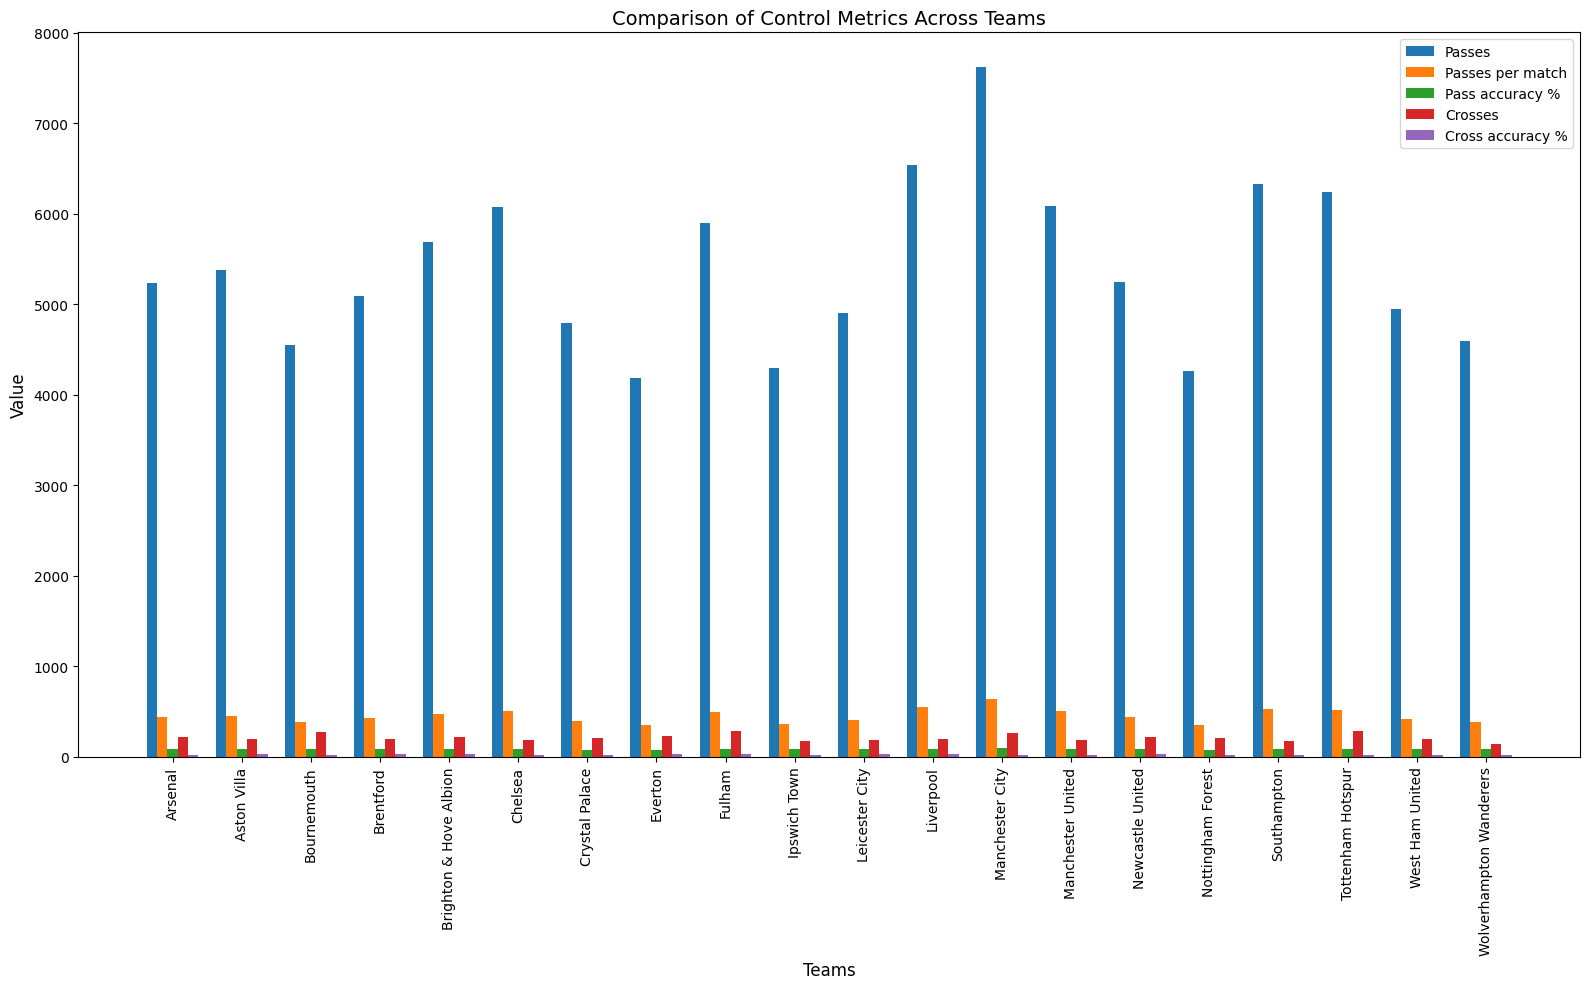

In [33]:
control_features = ['Passes', 'Passes per match', 'Pass accuracy %', 'Crosses', 'Cross accuracy %']
control_data = pd.DataFrame(data=df[control_features].values, index=df['Team'], columns=control_features)
plt.figure(figsize=(16, 10))
bar_width = 0.15
x = np.arange(len(control_data.index))
for i, feature in enumerate(control_features):
    plt.bar(x + i * bar_width, control_data[feature], bar_width, label=feature)
plt.title('Comparison of Control Metrics Across Teams', fontsize=14)
plt.xlabel('Teams', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(x + bar_width * 2, control_data.index, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()



Heatmap of Correlations - Attacking Performance

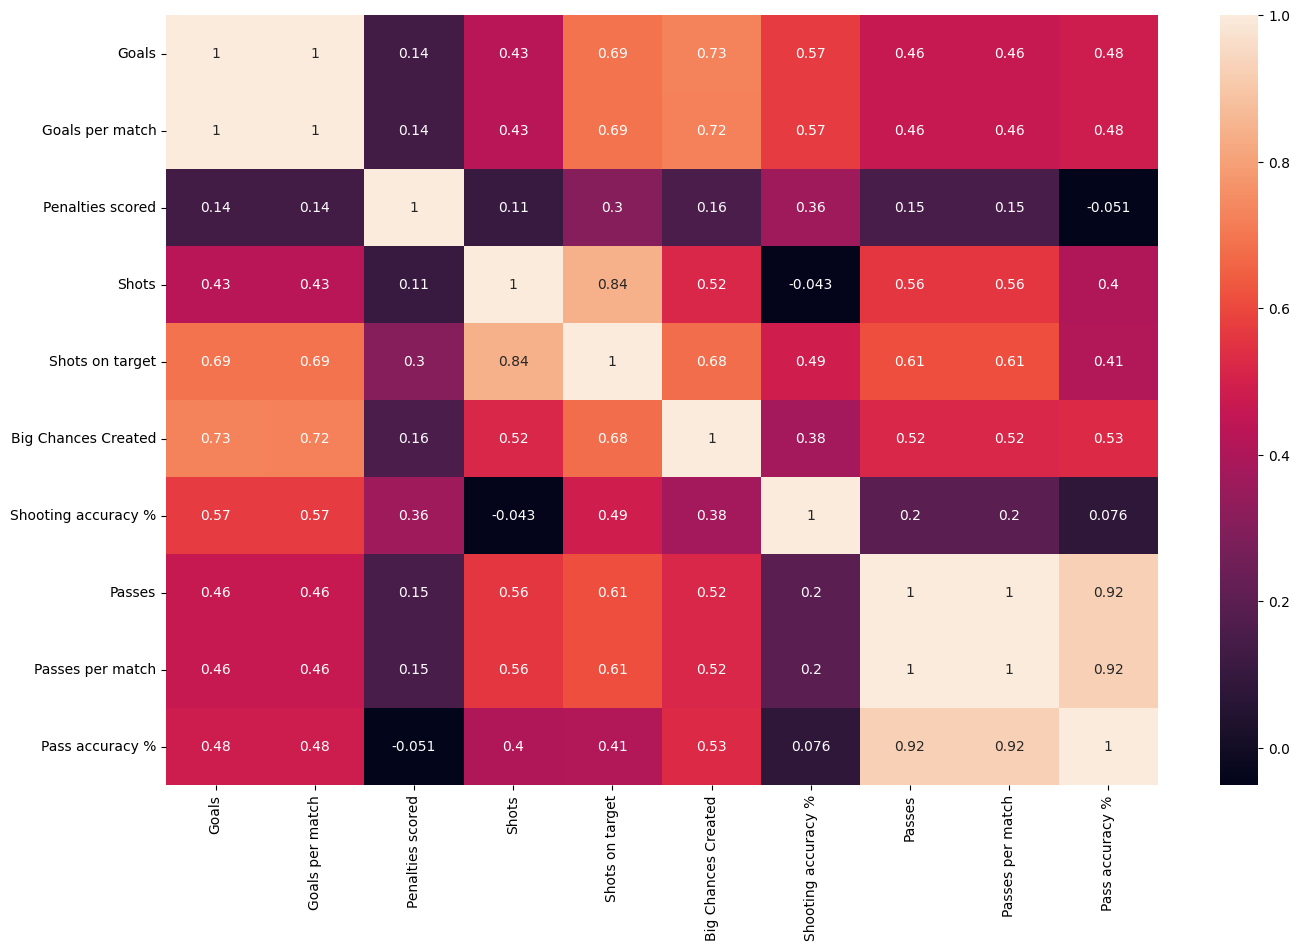

In [37]:
plt.figure(figsize=(16, 10))
attack_data_correlations = df[['Goals', 'Goals per match', 'Penalties scored', 'Shots', 'Shots on target', 'Big Chances Created', 'Shooting accuracy %', 'Passes', 'Passes per match', 'Pass accuracy %']].corr()
hm_attack = sns.heatmap(data=attack_data_correlations, annot=True)
plt.show()

Heatmap of Correlations - Defensing Performance

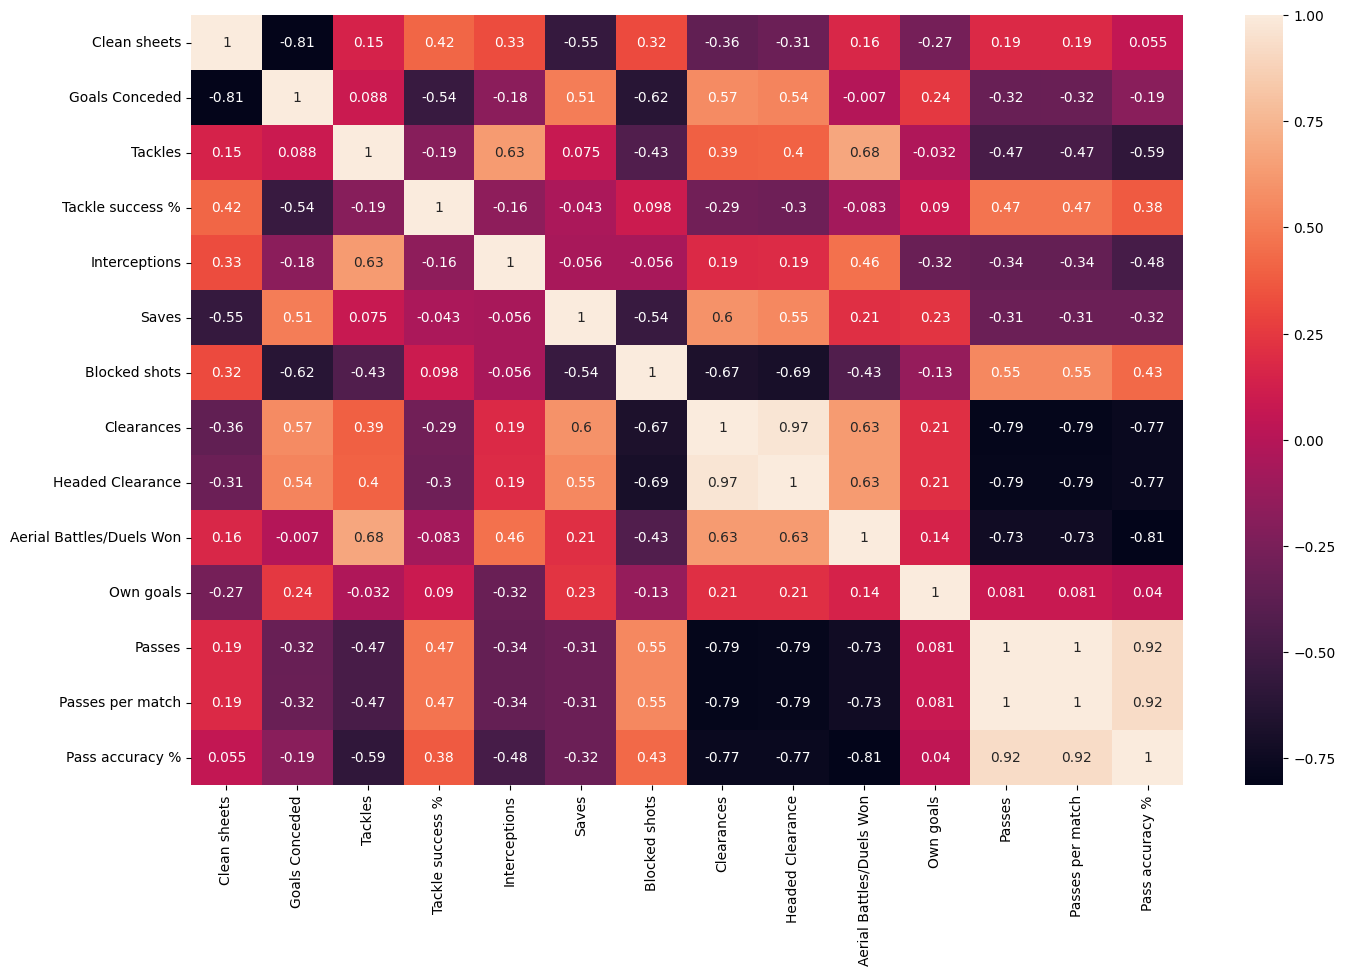

In [38]:
plt.figure(figsize=(16, 10))
defense_data_correlation = df[['Clean sheets', 'Goals Conceded', 'Tackles', 'Tackle success %', 'Interceptions', 'Saves', 'Blocked shots', 'Clearances', 'Headed Clearance', 'Aerial Battles/Duels Won', 'Own goals', 'Passes', 'Passes per match', 'Pass accuracy %']].corr()
sns.heatmap(data=defense_data_correlation, annot=True)
plt.show()

Yellow Cards and Fouls

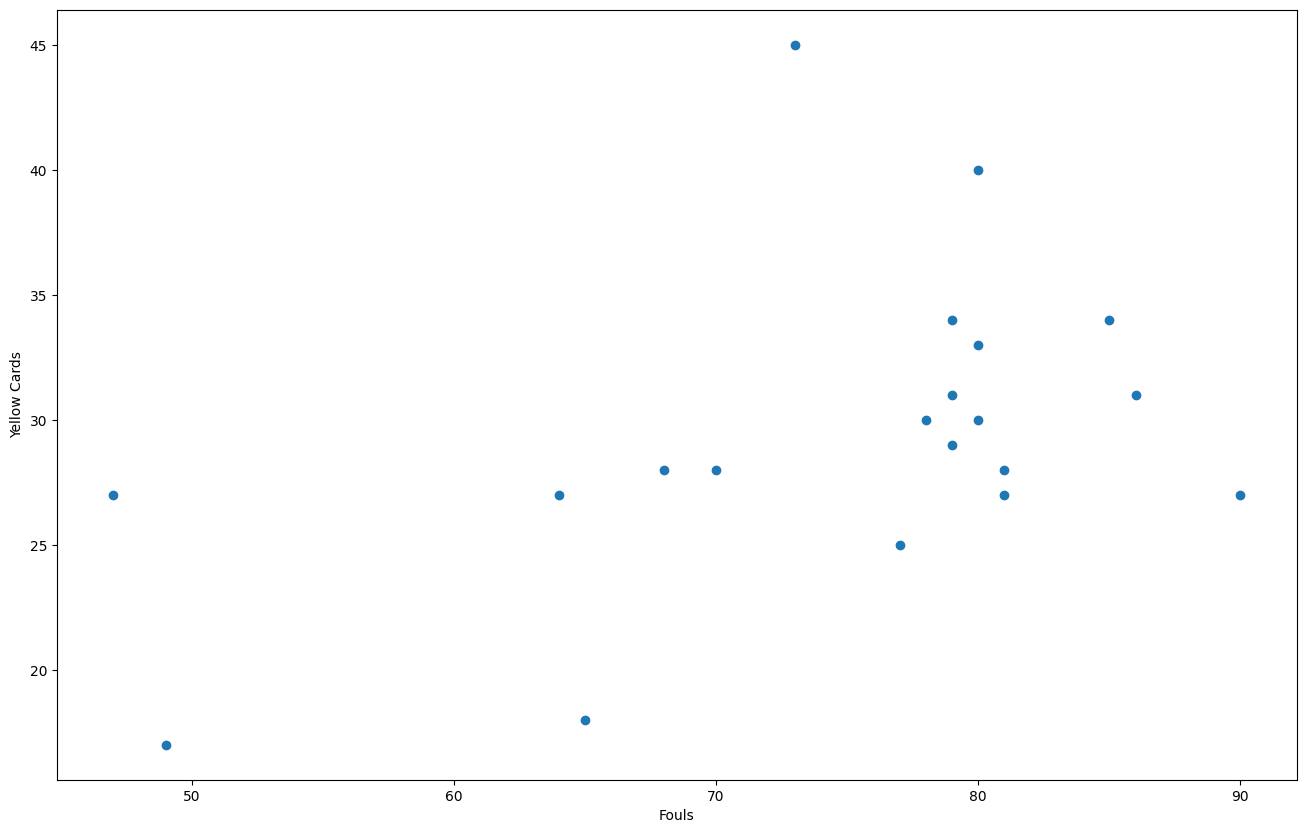

In [39]:
fouls = df['Fouls']
yellow_cards = df['Yellow cards']
plt.figure(figsize=(16, 10))
plt.scatter(x=fouls, y=yellow_cards)
plt.xlabel('Fouls')
plt.ylabel('Yellow Cards')
plt.show()

Red Cards and Fouls

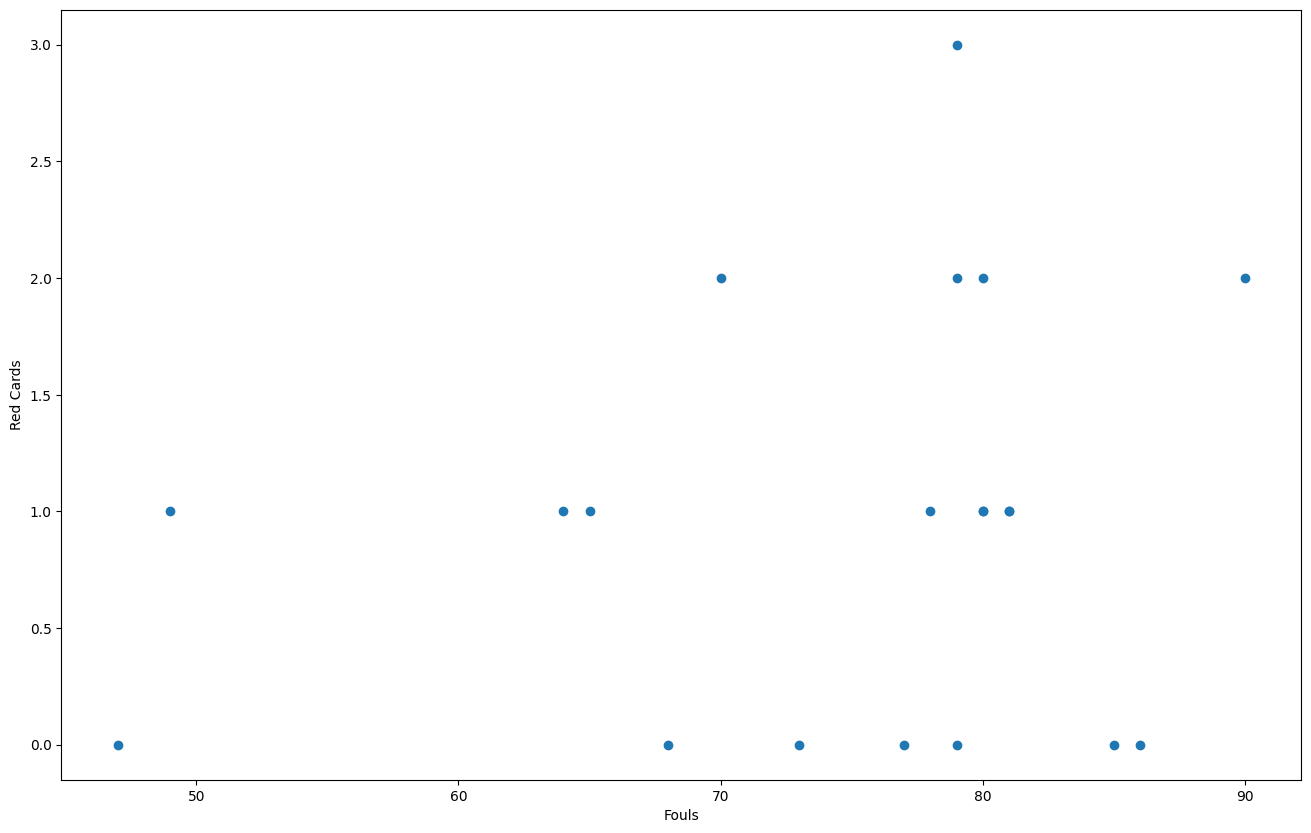

In [40]:
red_cards = df['Red cards']
plt.figure(figsize=(16, 10))
plt.scatter(x=fouls, y=red_cards)
plt.xlabel('Fouls')
plt.ylabel('Red Cards')
plt.show()